# Compare different measurements files

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from lifa.licel import LicelLidarMeasurement
import pprint

## Extract data from files

In [45]:
# Measurements files
# Makes average of files under same label.
files_list = {
    "com janela topo" : r"d:\FAMES\Medidas\20250925-20250926T143729Z-1-001\20250925\com janela\t???????.??????",
    "com janela centro" : r"d:\FAMES\Medidas\20250925-20250926T143729Z-1-001\20250925\com janela\a???????.??????",
    "com janela background" : r"d:\FAMES\Medidas\20250925-20250926T143729Z-1-001\20250925\com janela\b???????.??????",

    "sem janela topo" : r"d:\FAMES\Medidas\20250925-20250926T143729Z-1-001\20250925\sem janela\t???????.??????",
    "sem janela centro" : r"d:\FAMES\Medidas\20250925-20250926T143729Z-1-001\20250925\sem janela\a???????.??????",
    "Mikhail infinito:" : r"d:\FAMES\Medidas\Medidas CEPEMA\20240903-Mikail\infinity\a???????.??????",
    "Mikhail pin hole 20.5:" : r"d:\FAMES\Medidas\Medidas CEPEMA\20240903-Mikail\pinhole_20_5\a???????.??????",

}

#files_list = {
#    "1": r"d:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\20250903 CEPEMA FLARE\a2590319.194507",
#    "2": r"d:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\20250903 CEPEMA FLARE\a2590319.202649",
#    "3": r"d:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\20250903 CEPEMA FLARE\a2590319.210793",
#    "4": r"d:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\20250903 CEPEMA FLARE\a2590319.214938",
#    "5": r"d:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\20250903 CEPEMA FLARE\a2590319.223082",


#}
# Measurement titles
title = 'Comparação medidas'

# Licel Channels of interest
licel_channels_names = ['00353.o_an', '00355.o_an', '00371.o_ph', '00395.s_ph',  
                        '00395.p_ph', '00460.o_an', '00532.o_an', '00530.o_an']

# Get files list in each directory
measurement_files = {}
for (label, files) in files_list.items():
    measurement_files[label] = glob.glob(files)


print("Arquivos entrados:")
pprint.pprint(measurement_files)



Arquivos entrados:
{'Mikhail infinito:': ['d:\\FAMES\\Medidas\\Medidas '
                       'CEPEMA\\20240903-Mikail\\infinity\\a2490321.110305',
                       'd:\\FAMES\\Medidas\\Medidas '
                       'CEPEMA\\20240903-Mikail\\infinity\\a2490321.114449',
                       'd:\\FAMES\\Medidas\\Medidas '
                       'CEPEMA\\20240903-Mikail\\infinity\\a2490321.122593',
                       'd:\\FAMES\\Medidas\\Medidas '
                       'CEPEMA\\20240903-Mikail\\infinity\\a2490321.130738',
                       'd:\\FAMES\\Medidas\\Medidas '
                       'CEPEMA\\20240903-Mikail\\infinity\\a2490321.134883',
                       'd:\\FAMES\\Medidas\\Medidas '
                       'CEPEMA\\20240903-Mikail\\infinity\\a2490321.143027',
                       'd:\\FAMES\\Medidas\\Medidas '
                       'CEPEMA\\20240903-Mikail\\infinity\\a2490321.151173',
                       'd:\\FAMES\\Medidas\\Medidas '
          

In [46]:
# Read files
measurements = {}
for i,(name, files) in enumerate(measurement_files.items()):
    measurements[name] = LicelLidarMeasurement(files)
    #measurements[titles[i]] = LicelLidarMeasurement(files)

# Subset by channels
measurements_full = {}
for name, data in measurements.items():
    measurements_full[name] = data.subset_by_channels(licel_channels_names)

# Subset by bins
bin_min = 0
bin_max = 300
measurements_subset = {}
for name, data in measurements_full.items():
    measurements_subset[name] = measurements_full[name].subset_by_bins(bin_min,bin_max)

# Average measurements on a channel 
measurements_average = {}
for name, data in measurements_subset.items():
    signal = []
    for channel_name, channel in measurements_subset[name].channels.items():
        signal.append([channel.z, channel.average_profile()])
        distance = channel.z
    signal = np.array(signal)
    measurements_average[name] = signal

C:\Users\jairo\OneDrive\Documentos\Git\lifa\lifa\licel.py:137: RuntimeWarning: divide by zero encountered in divide
  norm = self.raw_data / float(self.number_of_shots)
C:\Users\jairo\OneDrive\Documentos\Git\lifa\lifa\licel.py:137: RuntimeWarning: invalid value encountered in divide
  norm = self.raw_data / float(self.number_of_shots)


## Plot averages

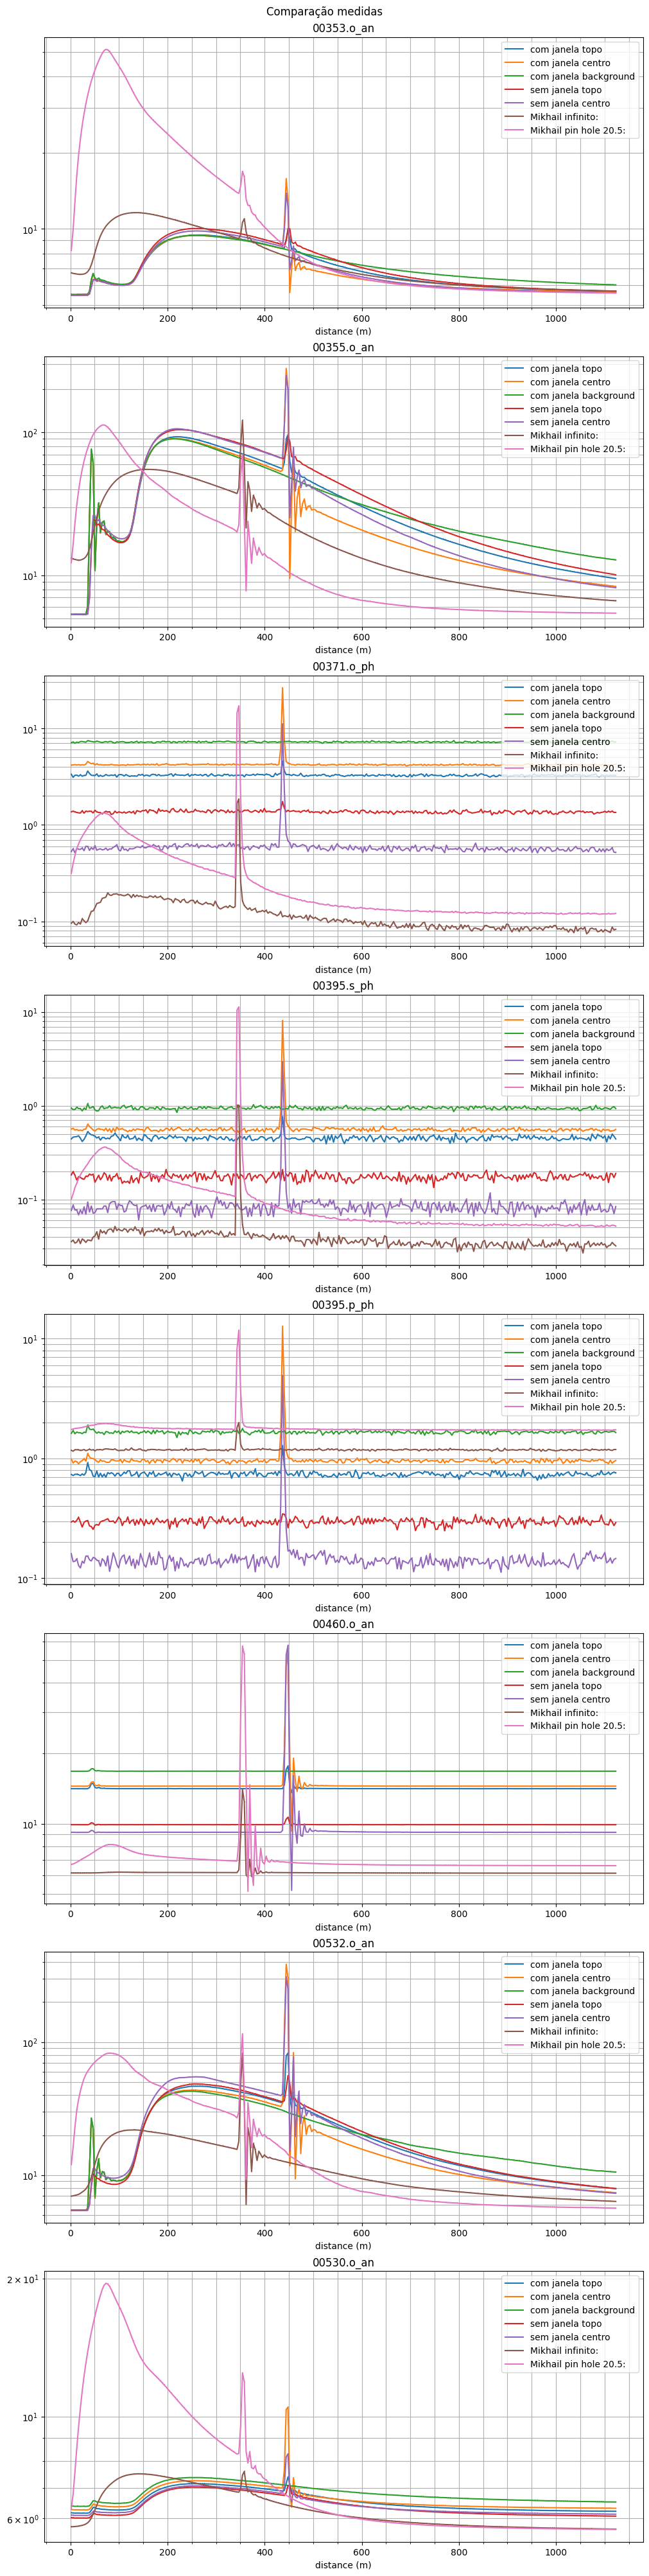

In [47]:
number_traces = len(licel_channels_names)
fig, ax = plt.subplots(nrows=number_traces, figsize=(10,40), layout='constrained')
fig.suptitle(title)
for name, data in measurements_average.items():
    for i,trace in enumerate(measurements_average[name]):
        ax[i].plot(trace[0], trace[1], label=name, marker=',')
        ax[i].set_title(licel_channels_names[i])
        ax[i].grid(True, 'both')
        ax[i].minorticks_on()
        ax[i].set_xlabel('distance (m)')
        #ax[i].set_ylabel('signal (mV)')
        ax[i].legend(loc='upper right')
        ax[i].set_yscale('log')

## Save to a file

In [48]:
fig.savefig('compare Mikhail.jpg')